# Mushroom Classification

In this exercise we'll use a decision tree to classify if a mushroom is posiounous or not.


In [115]:
import pandas as pd

In [116]:
df = pd.read_csv("mushrooms.csv")

In [117]:
df.shape

(8124, 23)

In [118]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Transform the categorical variables to integers using LabelEncoder.

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
 

In [121]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Train Test Split

Split your data into a training and testing split.

In [122]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score

In [123]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [124]:
cv_results

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Modeling

Fit the random forest model to the training data.

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model =  RandomForestClassifier()

In [127]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
y_pred = model.predict(X_test)

# Evaluation

Evaluate your model using the imported metrics.

In [129]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [130]:
accuracy_score(y_test,y_pred)

1.0

In [131]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1070
          1       1.00      1.00      1.00       961

avg / total       1.00      1.00      1.00      2031



In [132]:
confusion_matrix(y_test,y_pred)

array([[1070,    0],
       [   0,  961]])

# Ploting

Plot what features are most important in the classification?

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'Feature Importance')

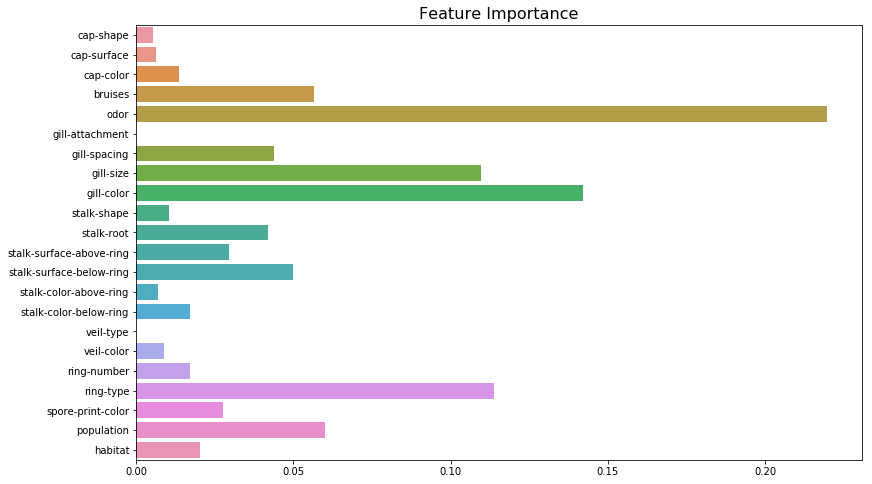

In [134]:
fig, ax = plt.subplots(figsize=(13,8))
sns.barplot(x=model.feature_importances_,y=X.columns, ax=ax )
ax.set_title("Feature Importance",size=16)

Retrain  a `DecisionTreeClassifier` using only the top 5 most important features what accuracy do you get? You may wish to limit the max depth since we're going to plot the tree later.

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
importance = pd.DataFrame({"features": X.columns.values, "importance":model.feature_importances_})
importance = importance.sort_values(by="importance",ascending=False)

In [136]:
importance.head()

,features,importance
4,odor,0.219686
8,gill-color,0.141935
18,ring-type,0.113757
7,gill-size,0.109631
20,population,0.060016


In [159]:
X = X[importance.features[:5].values]
X_train,X_test,y_train,y_test = train_test_split(X,y)

model =  DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9734121122599705

Use to plot tree function to visulize the decision tree

In [160]:
import sys
sys.path.append("..")
from tree_plots import plot_tree
from IPython.display import Image

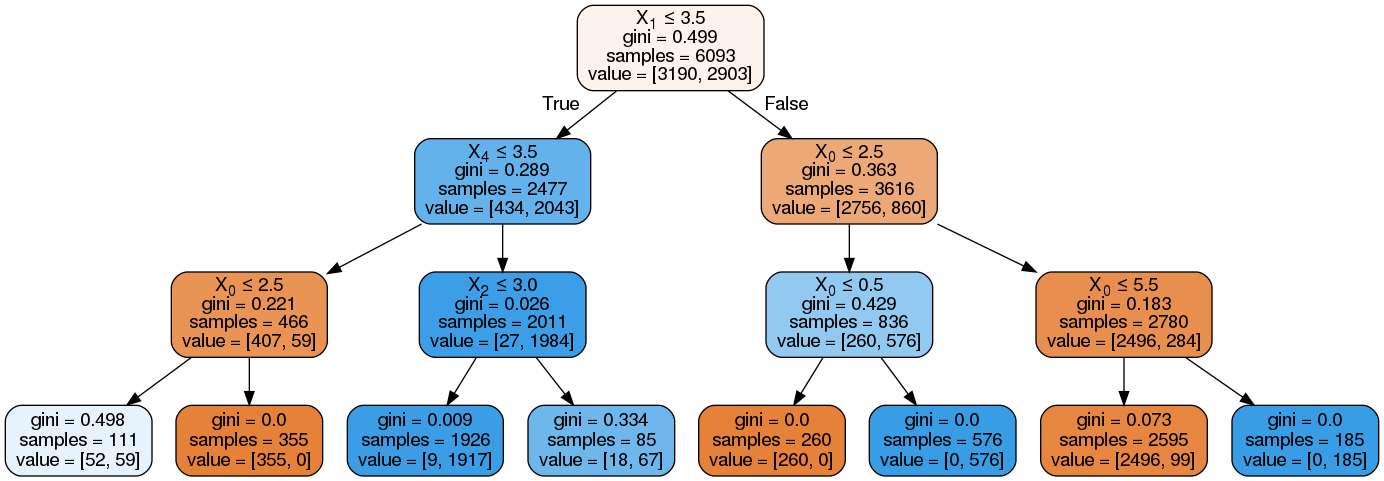

In [161]:
Image(plot_tree(model))